# Описательная статистика "US Homicide Reports"

## Загрузка данных и их описание

Датасет https://www.kaggle.com/murderaccountability/homicide-reports

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('database.csv')

In [7]:
df.head(3).info

<bound method DataFrame.info of    Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male               15  Native American/Alaska Native   
1            Male               42                          White   
2         Unknown                0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0       

In [5]:
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [6]:
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [7]:
df.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

## Описательная статистика

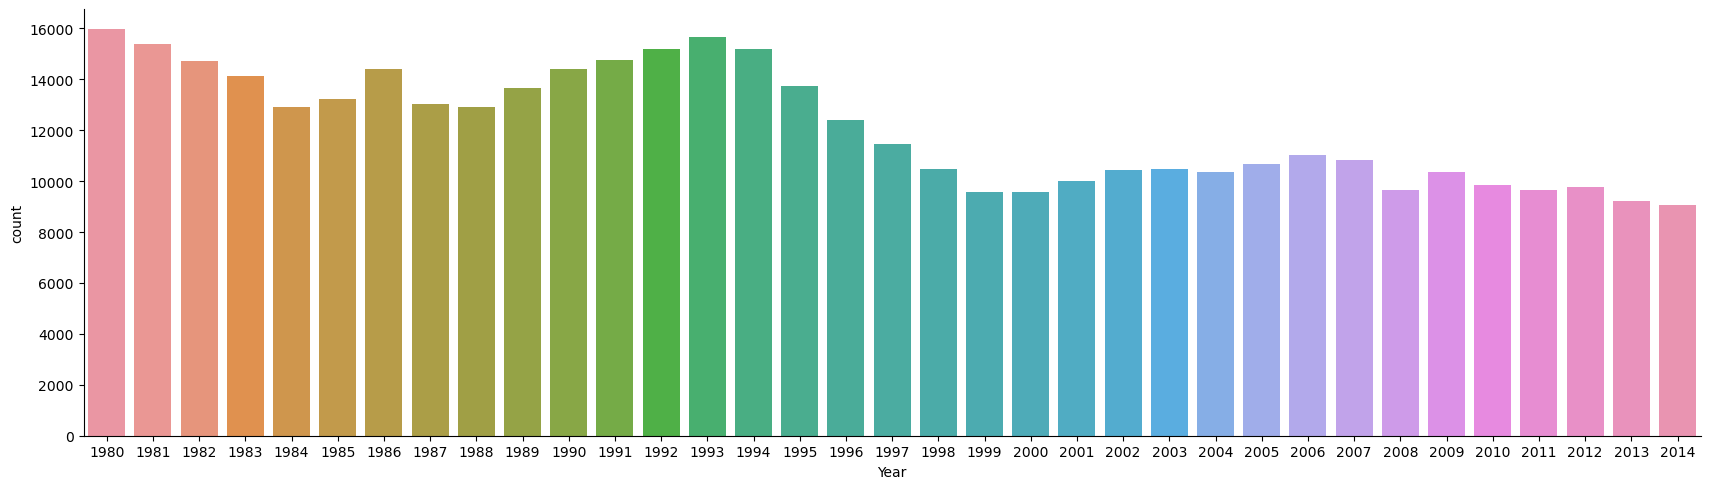

In [114]:
sns.catplot('Year', data=df, kind='count').fig.set_size_inches(20,5)

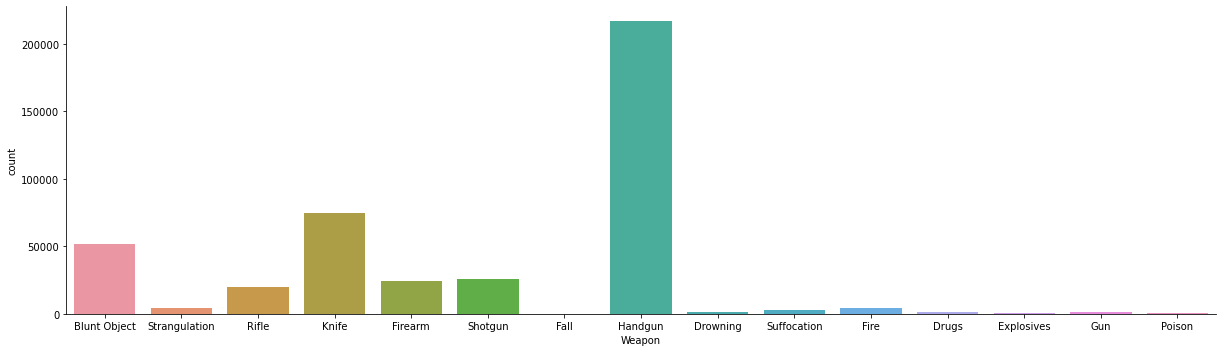

In [9]:
df.drop(df[df['Perpetrator Sex'] == 'Unknown'].index, inplace = True)
df.drop(df[df['Weapon'  ] == 'Unknown'].index, inplace = True)
sns.catplot('Weapon', data = df, kind ='count').fig.set_size_inches(20,5)

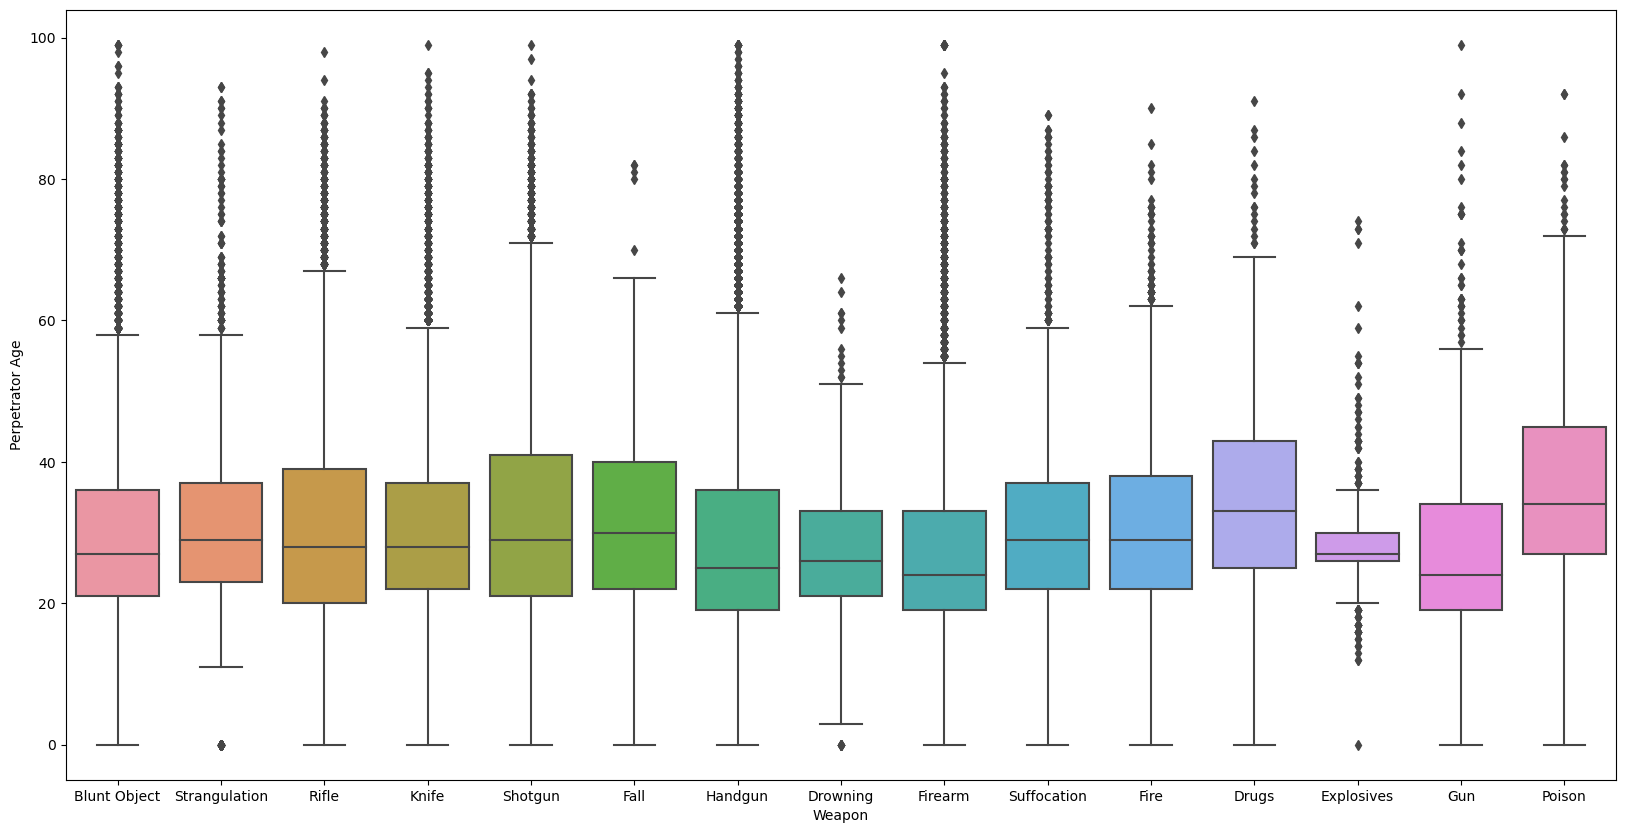

In [133]:
df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)
    
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Weapon'], y = df['Perpetrator Age'])
plt.show()

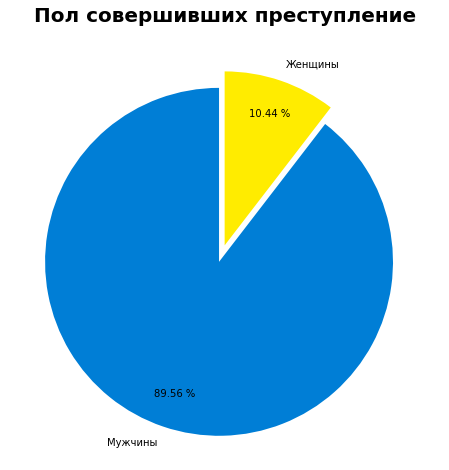

In [10]:
male = df.loc[df['Perpetrator Sex'] == 'Male'].count()[0]
female = df.loc[df['Perpetrator Sex'] == 'Female'].count()[0]

labels = ['Мужчины','Женщины']
colors = ['#007ED6','#FFEC00']
psex = [male, female]
explode = (0.1, 0)

plt.figure(figsize=(8,8))
plt.pie(psex, labels = labels, colors = colors, startangle = 90, autopct = '%.2f %%', pctdistance = 0.8, explode = explode)
plt.title('Пол совершивших преступление', fontdict = {'fontweight':'bold','fontsize':20})
plt.show()

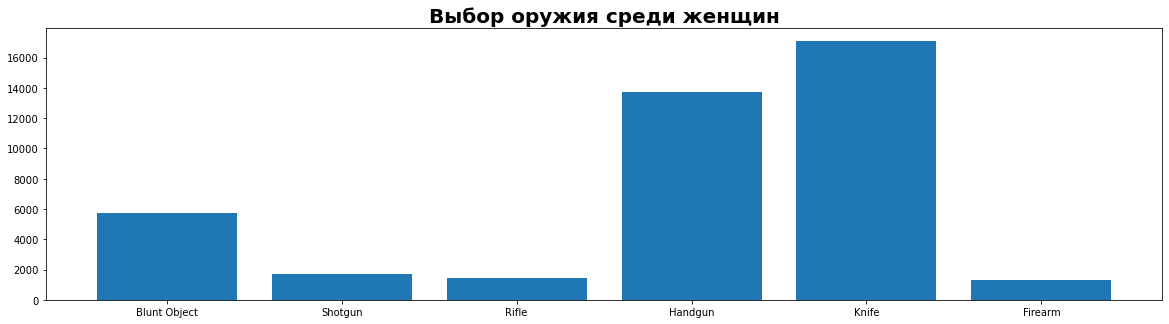

In [19]:
fmblunt = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Blunt Object')].count()[0]
fmshotgun = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Shotgun')].count()[0]
fmrifle = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Rifle')].count()[0]
fmhandgun = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Knife')].count()[0]
fmknife = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Handgun')].count()[0]
fmfirearm = df.loc[(df['Perpetrator Sex'] == 'Female') & (df['Weapon'] == 'Firearm')].count()[0]

fmcount = [fmblunt, fmshotgun, fmrifle, fmhandgun, fmknife, fmfirearm]
fmtype = ['Blunt Object', 'Shotgun', 'Rifle', 'Handgun', 'Knife', 'Firearm']

plt.figure(figsize=(20,5))
plt.title("Выбор оружия среди женщин", fontdict={'fontweight':'bold','fontsize':20})
plt.bar(fmtype, fmcount)
plt.show()

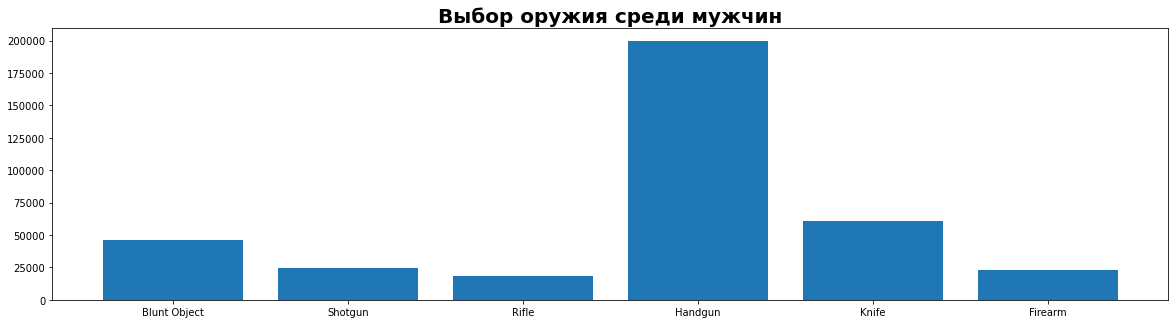

In [20]:
mlblunt = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Blunt Object')].count()[0]
mlrifle = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Rifle')].count()[0]
mlknife = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Knife')].count()[0]
mlhandgun = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Handgun')].count()[0]
mlshotgun = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Shotgun')].count()[0]
mlfirearm = df.loc[(df['Perpetrator Sex'] == 'Male') & (df['Weapon'] == 'Firearm')].count()[0]

mlcount = [mlblunt, mlshotgun, mlrifle, mlhandgun, mlknife, mlfirearm]
mltype = ['Blunt Object', 'Shotgun', 'Rifle', 'Handgun', 'Knife', 'Firearm']

plt.figure(figsize=(20,5))
plt.title("Выбор оружия среди мужчин", fontdict = {'fontweight':'bold','fontsize':20})
plt.bar(mltype, mlcount)
plt.show()

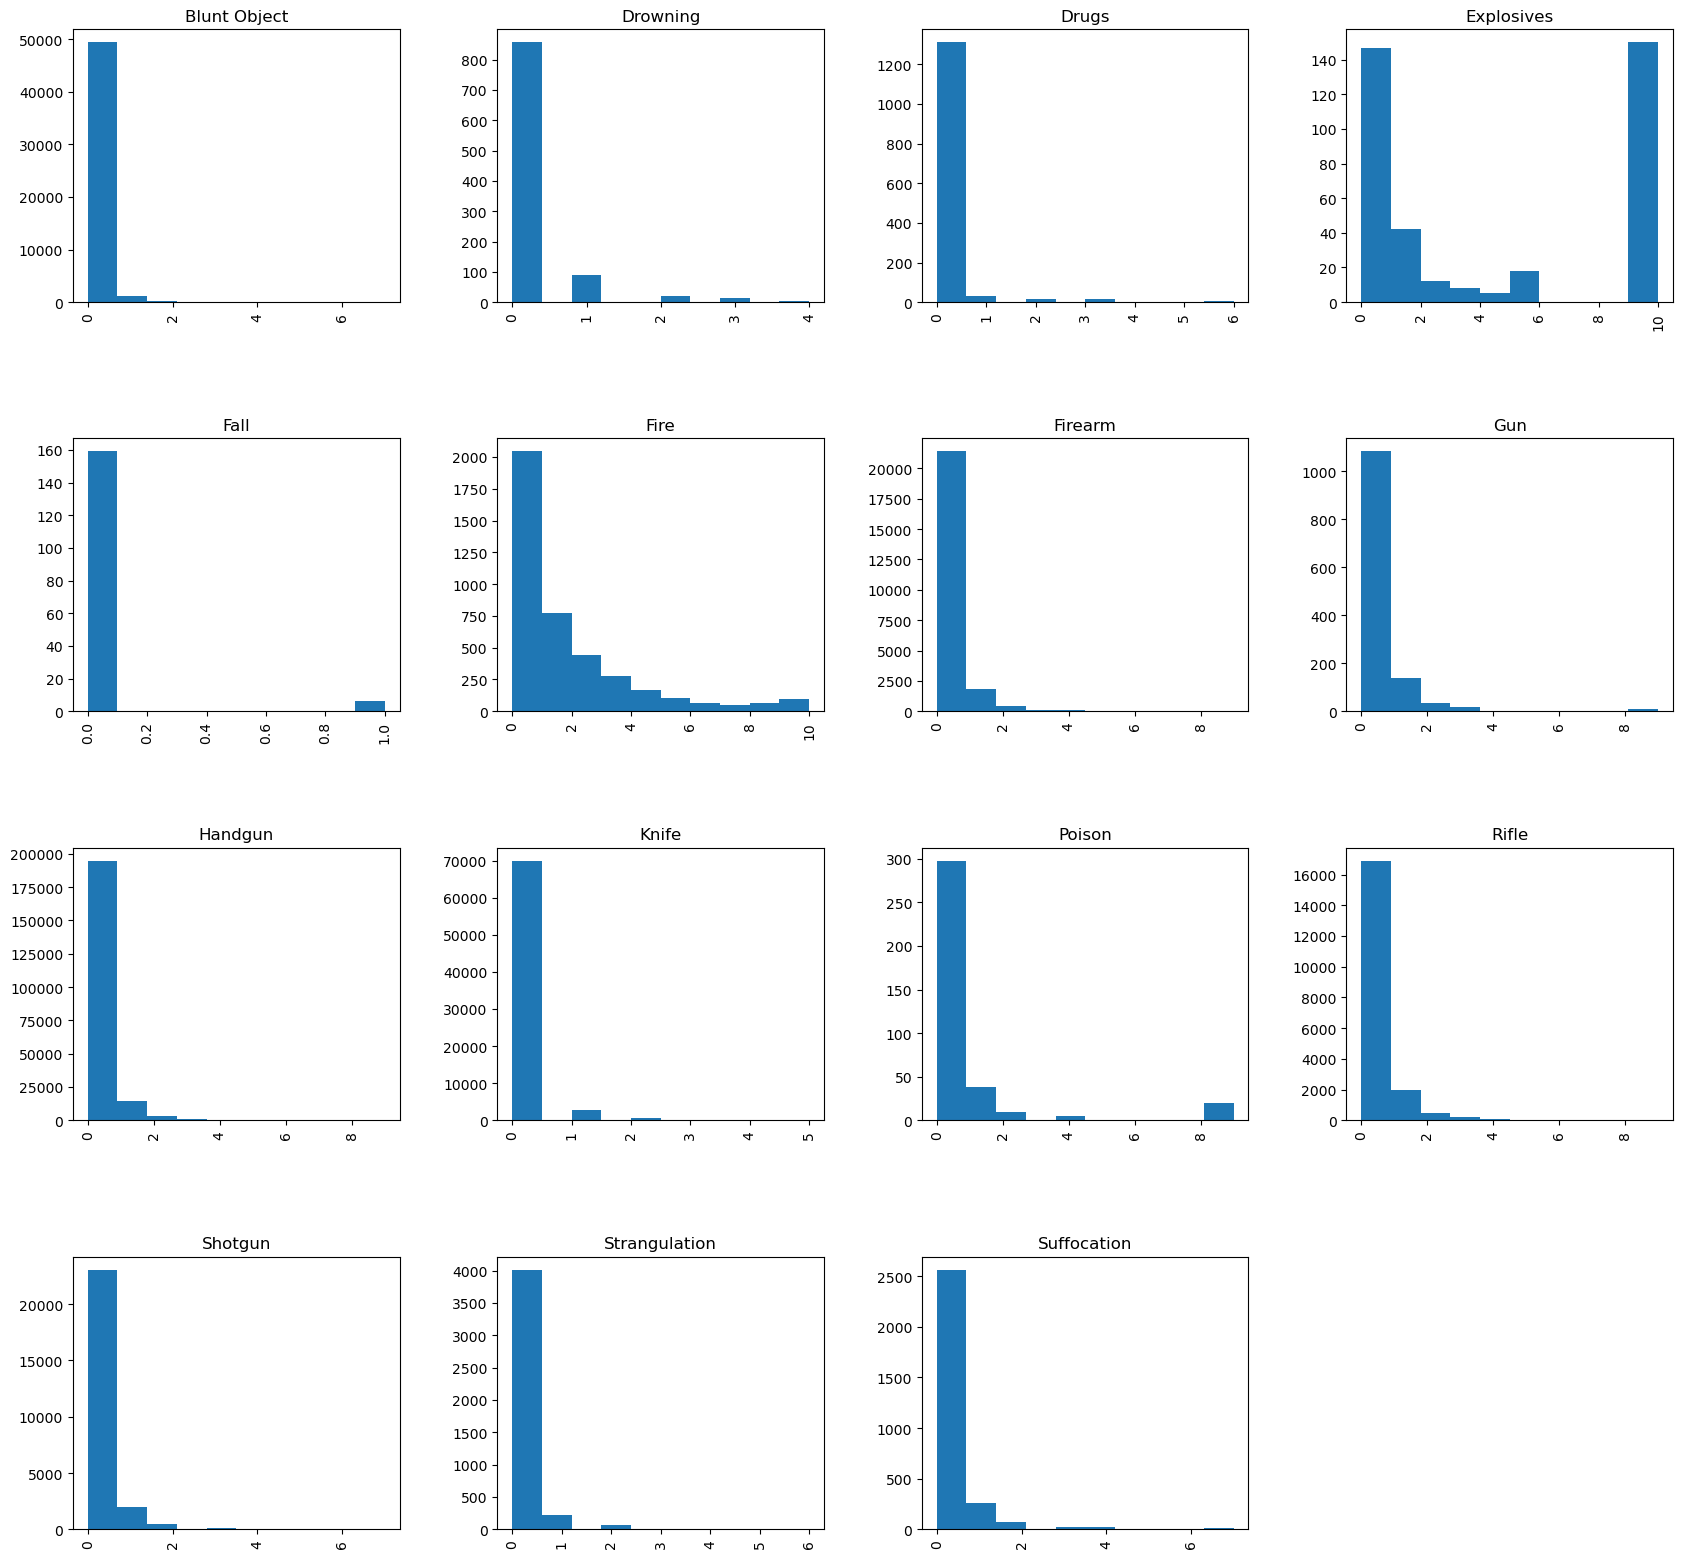

In [105]:
df.hist('Victim Count', by = 'Weapon', figsize = [20,20], bins=10)
plt.show()